In [1]:
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt

In [2]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    
    z2 = a1.dot(W2) + b2

    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    log_probs = -np.log(probs[range(num_examples), y])
    loss = np.sum(log_probs)

    return 1./num_examples * loss

def build_model(nn_hdim, num_passes=30000, print_loss=False):
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = {}

    # Gradient descent.
    for i in range(0, num_passes):
        # forward
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   # this is softmax

        # bp
        delta3 = probs
        delta3[range(num_examples), y] -= 1    # this is the derivative of softmax [no need to thoroughly understand yet]
		                                       #                                   [we'll revisit in weeks later]
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) # tanh derivative
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # optional
        W1 += -lr * dW1
        b1 += -lr * db1
        W2 += -lr * dW2
        b2 += -lr * db2

        model = {'W1': W1, 'b1':b1, 'W2':W2, 'b2': b2}

        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model)))
    return model

In [3]:
# 生成数据集
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.2)

num_examples = len(X)       # size of training set
nn_input_dim = 2
nn_output_dim = 2

lr = 0.01
reg_lambda = 0.01

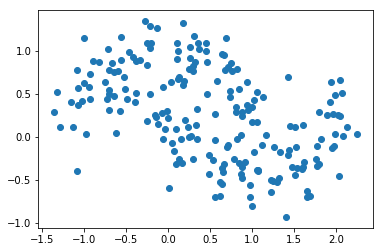

In [4]:
plt.scatter(X[:,0],X[:,1])

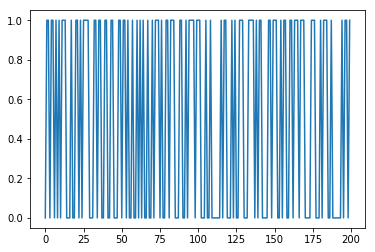

In [5]:
plt.plot(y)

In [6]:
X.shape,y.shape

((200, 2), (200,))

In [9]:
# n-dimesional hidden layer
model = build_model(10, print_loss = True)

Loss after iteration 0: 0.424289
Loss after iteration 1000: 0.049298
Loss after iteration 2000: 0.032699
Loss after iteration 3000: 0.025127
Loss after iteration 4000: 0.020693
Loss after iteration 5000: 0.017718
Loss after iteration 6000: 0.015628
Loss after iteration 7000: 0.014122
Loss after iteration 8000: 0.012999
Loss after iteration 9000: 0.012134
Loss after iteration 10000: 0.011451
Loss after iteration 11000: 0.010905
Loss after iteration 12000: 0.010463
Loss after iteration 13000: 0.010100
Loss after iteration 14000: 0.009798
Loss after iteration 15000: 0.009543
Loss after iteration 16000: 0.009322
Loss after iteration 17000: 0.009128
Loss after iteration 18000: 0.008952
Loss after iteration 19000: 0.008786
Loss after iteration 20000: 0.008617
Loss after iteration 21000: 0.008428
Loss after iteration 22000: 0.008209
Loss after iteration 23000: 0.007968
Loss after iteration 24000: 0.007698
Loss after iteration 25000: 0.007384
Loss after iteration 26000: 0.007020
Loss after ite